<a href="https://colab.research.google.com/github/Mawrobnew/TC3002B/blob/main/Experiment2__Data_augmentation_Coffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data augmentation coffe**
En este proyecto, se desarrollará un modelo de red neuronal convolucional para realizar una clasificación binaria con el objetivo de distinguir entre dos tipos de café: espresso (café extraído en estado puro del grano) y longblack (café expreso mezclado con agua caliente). Para este propósito, se utilizará un dataset creado por "Philippe - Kangaroo.AI", que consta de 400 imágenes recortadas en una proporción de 1:1 y con un tamaño de 256x256 píxeles.

Además, se usarán como referencia dos repositorios adicionales donde se ha llevado a cabo esta misma clasificación binaria utilizando el mencionado dataset, lo que proporcionará recursos valiosos para el desarrollo del proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1"
!ls

/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1
 augmented
 Base_Data_augmentation_Coffe.ipynb
'Experiment1_ Data_augmentation_Coffe.ipynb'
'Experiment2_ Data_augmentation_Coffe.ipynb'
 images


# Modificaciones de imágenes

ImageDataGenerator es una clase en la biblioteca Keras de Python que se utiliza para generar imágenes en tiempo real durante el entrenamiento. ImageDataGenerator permite realizar transformaciones de las imágenes de entrada para aumentar la diversidad de los datos de entrenamiento.

Las transformaciones utilizadas para este proyecto fueron la reescala de los valores, rango de ángulos, rango de desplazamiento, cortes aleatorios y zoom. Esto se definió así para tener una mayor variedad en las imágenes.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#Train
#Modificaciones de la imagen
#Configura el ImageDataGenerator para realizar modificaciones en las imágenes de entrnamiento.
#Rescale: Rescala los valores de los píxeles de la imagen a un rango de 0 a 1
#Rotation_range: Rango de ángulos en grados para rotar aleatoriamente las imágenes
#Width/height: Rangos para desplazar aleatoriamente horizontalmente y verticalmente imágenes
#Shear_range: Rango para aplicar cortes aleatorios a las imágenes 
#Zoom_range: Rango para aplicar zoom aleatorio a las imágenes
#Horizontal_flip: Voltea horizontalmente aleatoriamente las imágenes
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)
							
#Reescala validation
val_datagen = ImageDataGenerator(1./255) #Rescala los valores de los píxeles para que estén en rango de 0 a 1


In [ ]:
#Genera un train
train_generator = train_datagen.flow_from_directory(
							train_dir, #Directorio que contiene imágenes de entrenamiento
							target_size = (150, 150), #Tamaño al que se redimensionarán todas las imágenes del entrenamiento
							batch_size = 15,  #Imágenes que se cargarán en cada lote durante el entrenamiento
							class_mode ='binary', #Clasificación binaria
							)


Found 228 images belonging to 2 classes.


In [ ]:
#Generando tu validation
val_generator = val_datagen.flow_from_directory( #Vas a usar para entrenat dentro del entrenamiento
							validation_dir, #Direcotio que contiene las imágenes de validación
							target_size = (150,150), #Tamaño al que se redimensionarán todas las imágenes de validación
							batch_size =15,  #Imágenes que se cargarán en cada lote durante el entrenamiento
							class_mode= 'binary')  #Clasificación binaria


Found 70 images belonging to 2 classes.


# Red neuronal 


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
						
#Carga modelo VGG16
#Weights='imagenet' : Carga los pesos preentrenados en conjunto de datos ImageNet
#include_top=False : No se incluyen las capas totalmente conectadas del modelo
#input_shape=(150,150,3): Especifica la forma de entrada de las imágenes a la red.
conv_base= VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))
conv_base.trainable = False ## Not trainable weights


#Se crea un modelo secuencial (Sequential) y se agrega la base convolucional de VGG16 como una capa
model = models.Sequential()
model.add(conv_base)
#Capas adicionales al modelo para adaptarlo
model.add(layers.Flatten()) #Mapa de características a un vector unidimensional
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



model.summary()

#Se compila el modelo especificando la función de pérdida, el optimizador y las métricas a utilizar. 
#En este caso, se utiliza la función de pérdida 'binary_crossentropy', el optimizador RMSprop con una tasa de aprendizaje de 2e-5 y 
#se registra la precisión ('acc') como la métrica
model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=1e-5),
						metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/25
7/7 [==============================] - ETA: 0s - loss: 0.7190 - acc: 0.4946

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


7/7 [==============================] - 56s 7s/step - loss: 0.7190 - acc: 0.4946 - val_loss: 2.3609 - val_acc: 0.6714
Epoch 2/25
7/7 [==============================] - 28s 5s/step - loss: 0.6606 - acc: 0.5806
Epoch 3/25
7/7 [==============================] - 24s 3s/step - loss: 0.6716 - acc: 0.5914
Epoch 4/25
7/7 [==============================] - 25s 4s/step - loss: 0.6187 - acc: 0.7097
Epoch 5/25
7/7 [==============================] - 25s 4s/step - loss: 0.6049 - acc: 0.7204
Epoch 6/25
7/7 [==============================] - 30s 4s/step - loss: 0.5955 - acc: 0.7714
Epoch 7/25
7/7 [==============================] - 25s 3s/step - loss: 0.5917 - acc: 0.6882
Epoch 8/25
7/7 [==============================] - 29s 4s/step - loss: 0.5336 - acc: 0.8381
Epoch 9/25
7/7 [==============================] - 29s 4s/step - loss: 0.5518 - acc: 0.7810
Epoch 10/25
7/7 [==============================] - 27s 4s/step - loss: 0.5673 - acc: 0.7527
Epoch 11/25
7/7 [==============================] - 27s 4s/step 

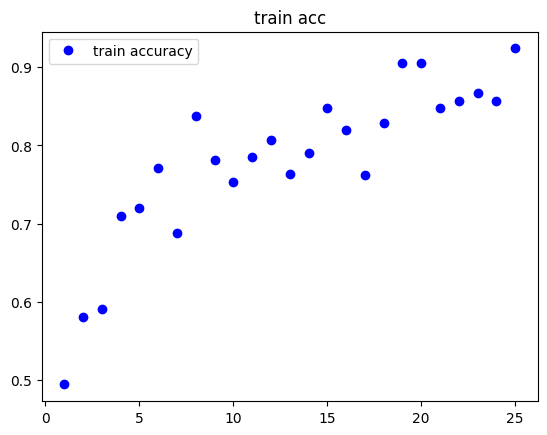

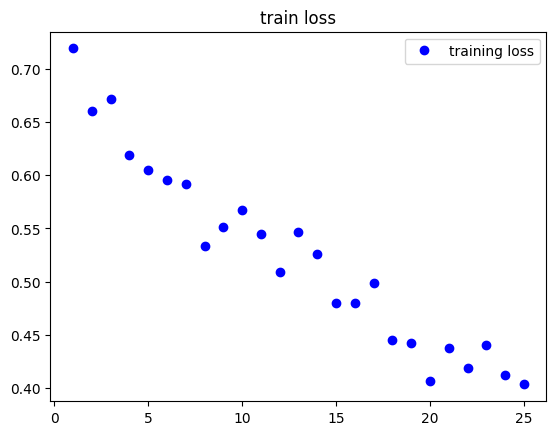

In [ ]:
#El modelo se entrena utilizando los generadores de datos 'train_generator' y 'val_generator' 
#Aquí internamente dentro del mismo método de entrenamiento ambas pruebas. Estás ejecutando el train y el validation

#método fit del modelo para iniciar el entrenamiento
history = model.fit(
				train_generator,
				steps_per_epoch =7,   #Número de pasos (batches) a considerar en cada época de entrenamiento. 
				epochs =25, 
				validation_data= val_generator, 
				validation_steps = 6,  #El número de pasos (batches) a considerar en cada época de validación.
				validation_split = 0.4 #Fracción de datos de entrenamiento que utilizará como validación
				)
				
#Métricas de precisión
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [ ]:
#Evaluación del modelo utilizando un conjunto de datos de prueba
test_datagen = ImageDataGenerator(1./255) #Reescala
test_generator = test_datagen.flow_from_directory(
					test_dir, #Directorio que contiene imágenes de prueba
					target_size = (150, 150), #Tamaño al que se redimensionarán
					batch_size = 44, #El número de imágenes que se cargarán en cada lote durante la evaluación.
					class_mode= 'binary')#Clase binaria

#Método evaluate del modelo para evaluar el rendimiento en los datos de prueba
test_loss, test_acc = model.evaluate(test_generator, steps = 20)
print('\ntest acc :\n', test_acc)


Found 44 images belonging to 2 classes.
 1/20 [>.............................] - ETA: 4:03 - loss: 3.4413 - acc: 0.7500

20/20 [==============================] - 13s 2ms/step - loss: 3.4413 - acc: 0.7500

test acc :
 0.75


# Matriz de confusión

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
#Matriz de confusión
test_imgs = test_generator[0][0] #Predicciones
test_labels = test_generator[0][1] # Etiquetas 


print(test_imgs.shape) #(44,150,150,3) Hay 44 imágenes
print(test_labels.shape) # (44,0) 



#print(test_imgs)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


(44, 150, 150, 3)
(44,)


2/2 [==============================] - 13s 5s/step
[[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
  0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.]]


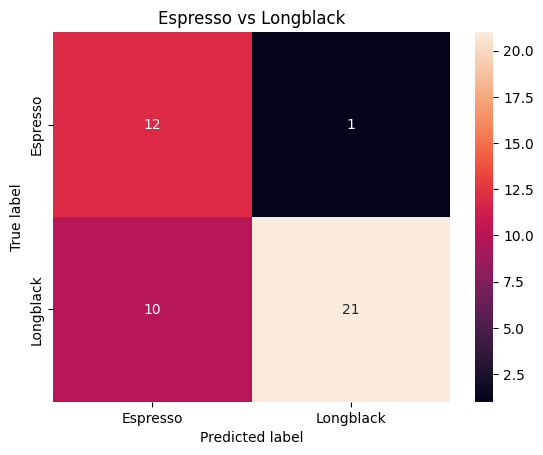

In [ ]:
#Obteniendo la predicción 
predictions = model.predict(test_imgs) # Devuelve la etiqueta aprendida para cada objeto en la matriz

classes_x = predictions.T
classes_x= np.rint(classes_x)

print(classes_x)
#Obtención de matriz de confusión
                #True Label #Prediction
cM=confusion_matrix(classes_x[0], test_labels)


df= pd.DataFrame(cM,index=['Espresso','Longblack'],columns=['Espresso','Longblack'])
plt.figure()
sns.heatmap(df,annot=True)
plt.title('Espresso vs Longblack')
plt.ylabel('True label')
plt.xlabel('Predicted label')
#disp=ConfusionMatrixDisplay(cM)
#disp.plot()
plt.show()

# Referencias
Referencias:
PHILIPPE. (2021). Coffee images. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/datasets/filhypedeeplearning/coffee-images

stpeteishii. (2021, 16 de noviembre). Coffee Images Classify Torch Conv2d. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/stpeteishii/coffee-images-classify-torch-conv2d

filhypedeeplearning. (2021, 24 de noviembre). Espresso or Longblack? Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/filhypedeeplearning/espresso-or-longblack/input